In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

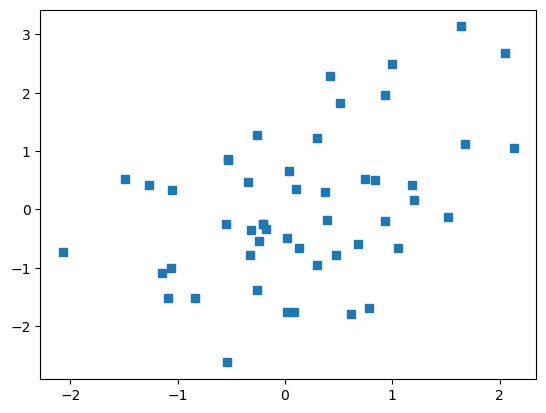

In [ ]:
def dataCreation(n, m ):
    x = torch.randn(n,1)
    y = m * x + torch.randn(n,1)
    return x, y


In [11]:
def model(x,y, learning_rate, num_epoch):
    ANN_regression = nn.Sequential(
        nn.Linear(1,1), #Linear unit
        nn.ReLU(), #activation function
        nn.Linear(1,1) #linear unit
    )
    loss_function= nn.MSELoss()
    optimizer = torch.optim.SGD(ANN_regression.parameters(), lr = learning_rate)
    epoch_array = loss_array = torch.zeros(num_epoch)
    for _epoch in range(num_epoch):
        y_hat = ANN_regression(x)
        loss = loss_function(y_hat,y)
        epoch_array[_epoch] = _epoch
        loss_array[_epoch] = loss

        #back prop 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    prediction = ANN_regression(x)
    return prediction, loss_array, epoch_array

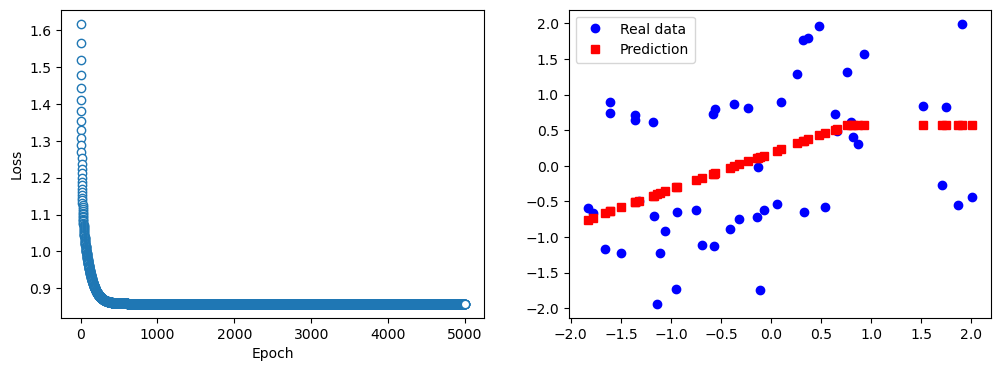

In [50]:
x,y = dataCreation(50,0.2)
prediction,loss,epoch = model(x,y,0.01,5000)
fig,ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(loss.detach(),'o',markerfacecolor = 'w')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[1].plot(x,y,'bo',label = 'Real data')
ax[1].plot(x,prediction.detach(),'rs',label = 'Prediction')

ax[1].legend()